<a href="https://colab.research.google.com/github/Billlee1231/ML/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a simple linear regression model using Keras

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [0]:
np.random.seed(10)

beta = np.transpose(np.array([1.5,2.4,-2.2]))
b = 3.33
X = np.random.uniform(low=-10,high=10, size=(1000,3))
Z = np.random.normal(loc=0, scale=1.0, size=X.shape[0])
Y = b+np.matmul(X, beta)+Z

In [41]:
model = tf.keras.Sequential()
model.add(layers.Dense(1, bias_initializer=tf.keras.initializers.constant(2.0)))
model.compile(optimizer=tf.train.AdamOptimizer(0.05), loss="mse", metrics=["mae"])
model.fit(X[:700], Y[:700], epochs=10, batch_size=32, validation_data=(X[700:,], Y[700:]))

Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 0s 482us/step - loss: 173.3219 - mean_absolute_error: 11.1867 - val_loss: 78.6759 - val_mean_absolute_error: 7.5917
Epoch 2/10
700/700 [==============================] - 0s 44us/step - loss: 43.9866 - mean_absolute_error: 5.6227 - val_loss: 16.0099 - val_mean_absolute_error: 3.3404
Epoch 3/10
700/700 [==============================] - 0s 47us/step - loss: 7.5576 - mean_absolute_error: 2.1992 - val_loss: 2.0202 - val_mean_absolute_error: 1.1507
Epoch 4/10
700/700 [==============================] - 0s 45us/step - loss: 1.3348 - mean_absolute_error: 0.9258 - val_loss: 1.0620 - val_mean_absolute_error: 0.8505
Epoch 5/10
700/700 [==============================] - 0s 53us/step - loss: 1.0619 - mean_absolute_error: 0.8274 - val_loss: 1.0669 - val_mean_absolute_error: 0.8543
Epoch 6/10
700/700 [==============================] - 0s 50us/step - loss: 1.0639 - mean_absolute_error: 0.8271 - val_loss

In [42]:
model.evaluate(X,Y,batch_size=32)

1000/1000 [==============================] - 0s 31us/step


[1.0549246816635132, 0.830829083442688]

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              multiple                  4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [44]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print (weights)

[array([[ 1.4855636],
       [ 2.3965683],
       [-2.1994267]], dtype=float32), array([3.3091948], dtype=float32)]


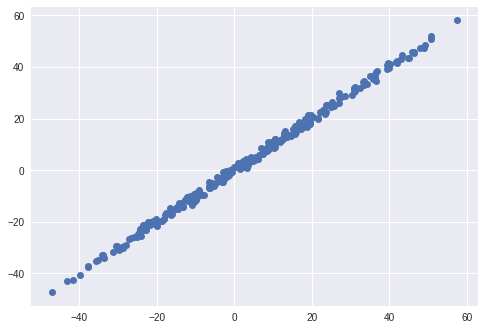

In [45]:
import matplotlib.pyplot as plt
Y_hat = model.predict(X[700:], batch_size=32)
plt.plot(Y_hat, Y[700:], "o")